### Chapter 18

# 응용_파이토치 프로그래밍 `CelebA를 이용한 이미지 분류`

## **CelebA 데이터셋을 사용하여 선택하고자 하는 이미지만 출력하기**

> ## 학습 목표 

- CelebA 데이터셋의 구조와 특성을 이해하고, PyTorch 라이브러리를 사용하여 CelebA 데이터셋을 로드하고 효율적으로 처리할 수 있다.
- CelebA 데이터셋이 특정 속성이나 속성 조합에 따라 이미지를 필터링하고 시각화할 수 있다.
- 선택된 이미지들의 공통 특성을 분석하고, 데이터셋의 속성 분포를 바탕으로 의미 있는 인사이트를 도출할 수 있다.

## **18.1 CelebA (CelebFaces Attributes Dataset)**

**CelebA 데이터셋은 사람 얼굴의 다양한 속성 성별, 나이, 안경 착용 여부 등을 레이블로 포함하고 있는 데이터셋**입니다. 이를 활용하여 성별에 따른 이미지를 필터링할 수 있습니다.

https://www.kaggle.com/datasets/jessicali9530/celeba-dataset?resource=download-directory&select=img_align_celeba

https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html

<img src="./image/face_img.png" width="800" height="" >

### **CelebA 데이터셋은 대규모 얼굴 속성 데이터셋**으로, 
### **200,000개 이상의 유명인 이미지와 각 이미지에 대한 40개의 속성 주석을 포함**하고 있습니다.

이 데이터셋은 컴퓨터 비전 분야에서 널리 사용되며, 얼굴 속성 인식, 얼굴 검출, 랜드마크 위치 추정 등 다양한 작업에 활용됩니다.

- "Deep Learning Face Attributes in the Wild" - Liu et al. (2015) 이 논문에서 CelebA 데이터셋이 처음 소개

- "CelebA-Spoof: Large-Scale Face Anti-Spoofing Dataset with Rich Annotations" - Zhang et al. (2020) 논문에서는 CelebA를 기반으로 한 얼굴 위조 방지 데이터셋을 소개합니다.

   625,537개의 이미지와 10,177명의 주체를 포함하는 더 큰 규모의 데이터셋을 가지고 있으며, 얼굴 위조 방지 데이터로 학습할 수 있게 구분되어 있습니다. 

## **18.2 학습 관련 내용**

### **18.2.1 CelebA 데이터셋을 사용한 학습시 고려할 사항**

1.  **데이터 전처리**:
    -   PyTorch의 torchvision.datasets.CelebA 클래스를 사용하여 데이터를 쉽게 로드할 수 있습니다
(https://pytorch.org/vision/main/generated/torchvision.datasets.CelebA.html).
    -   이미지 크기는 일반적으로 178x218 픽셀입니다.
    
2.  **데이터 증강**:
    -   오버피팅을 방지하고 모델의 일반화 능력을 향상시키기 위해 데이터 증강 기법을 사용합니다
    
3.  **모델 선택**:
    -   컨볼루션 신경망(CNN)이 주로 사용됩니다.
    -   InceptionV3와 같은 사전 훈련된 모델을 사용하여 전이 학습을 수행할 수 있습니다.
    
4.  **학습 전략**:
    -   대규모 데이터셋이므로 배치 학습이 효과적입니다.
    -   학습 세트, 검증 세트, 테스트 세트로 나누어 사용합니다. 예를 들어, 10,000개의 이미지를 학습에, 2,000개씩을 검증과 테스트에 사용할 수 있습니다.
    
5.  **주의사항**:
    -   CelebA 데이터셋의 레이블 품질에 대한 우려가 있습니다. 일부 속성은 일관성이 낮거나 부정확할 수 있으므로 주의가 필요합니다[

6.  **평가 지표**:
    -   정확도, F1 점수 등의 지표를 사용하여 모델 성능을 평가합니다.

CelebA 데이터셋은 풍부한 주석과 다양성으로 인해 얼굴 인식 및 속성 분류 작업에 매우 유용하지만, 레이블의 정확성에 주의를 기울이고 필요한 경우 데이터 정제 과정을 거치는 것이 좋습니다.

### **18.2.2 CelebA 데이터셋에는 40개의 얼굴 특징(attribute)에 대한 바이너리 속성이 포함**되어 있습니다. 
 
 다양한 얼굴 특징을 이 속성들로 나타내며, 각 이미지에 대해 해당 속성이 존재하는지의 여부를 나타냅니다.

다음은 CelebA 데이터셋에서 제공하는 40개의 얼굴 특징 속성 목록입니다:

1.  **5\_o\_Clock\_Shadow** (5시 방향 그림자)
2.  **Arched\_Eyebrows** (아치형 눈썹)
3.  **Attractive** (매력적)
4.  **Bags\_Under\_Eyes** (눈 밑에 다크서클)
5.  **Bald** (대머리)
6.  **Bangs** (앞머리)
7.  **Big\_Lips** (크고 두꺼운 입술)
8.  **Big\_Nose** (큰 코)
9.  **Black\_Hair** (검은 머리카락)
10.  **Blond\_Hair** (금발 머리)
11.  **Blurry** (블러 처리된 이미지)
12.  **Brown\_Hair** (갈색 머리)
13.  **Bushy\_Eyebrows** (굵은 눈썹)
14.  **Chubby** (통통한 얼굴)
15.  **Double\_Chin** (이중 턱)
16.  **Eyeglasses** (안경 착용)
17.  **Goatee** (턱수염)
18.  **Gray\_Hair** (회색 머리)
19.  **Heavy\_Makeup** (진한 메이크업)
20.  **High\_Cheekbones** (높은 광대)
21.  **Male** (남성)
22.  **Mouth\_Slightly\_Open** (입을 약간 벌림)
23.  **Mustache** (콧수염)
24.  **Narrow\_Eyes** (좁은 눈)
25.  **No\_Beard** (턱수염 없음)
26.  **Oval\_Face** (달걀형 얼굴)
27.  **Pale\_Skin** (창백한 피부)
28.  **Pointy\_Nose** (뾰족한 코)
29.  **Receding\_Hairline** (후퇴하는 헤어라인)
30.  **Rosy\_Cheeks** (발그레한 뺨)
31.  **Sideburns** (구레나룻)
32.  **Smiling** (미소)
33.  **Straight\_Hair** (곱슬이 아닌 직모)
34.  **Wavy\_Hair** (웨이브 머리)
35.  **Wearing\_Earrings** (귀걸이 착용)
36.  **Wearing\_Hat** (모자 착용)
37.  **Wearing\_Lipstick** (립스틱 착용)
38.  **Wearing\_Necklace** (목걸이 착용)
39.  **Wearing\_Necktie** (넥타이 착용)
40.  **Young** (젊음)

이 속성들을 활용하여 다양한 얼굴 특징을 필터링하고 분석할 수 있습니다. 

**예를 들어, 특정 헤어 컬러, 메이크업 상태, 나이대 등 다양한 조건을 조합하여 원하는 이미지를 선택할 수 있습니다.**

이러한 속성 정보가 담긴 파일이 `list_attr_celeba.txt`와 같은 파일에 있으며, 각 이미지에 대해 **각 속성이 존재하면 1, 존재하지 않으면 -1**로 표시됩니다. 

이를 기반으로 필터링 및 추가 작업을 수행할 수 있습니다.

> # 여성 사진만 추출 : "여성 얼굴 갤러리"

## 1. 데이터셋 다운로드 및 전처리

먼저, Kaggle에서 CelebA 데이터셋 또는 CUHK의 공식 사이트에서 데이터셋을 다운로드합니다.

**base_dir = 'C:/Users/USER/Desktop/pytorch_book/data/celeba'**

**base_dir = 'c:/PyTorch/data/celeba'**

## 2. 파이토치 설정 및 데이터 로딩

In [ ]:
%pip install torch torchvision pandas pillow matplotlib

In [2]:
import torch
import torchvision
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

# 패키지가 제대로 설치되고 임포트 되는지 확인하세요.
print("필요한 라이브러리가 설치되어 있습니다.!")

필요한 라이브러리가 설치되어 있습니다.!


이미지 디렉토리: ./data/celeba/img_align_celeba
속성 파일: ./data/celeba/list_attr_celeba.csv

속성 파일 내용 확인:
image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1

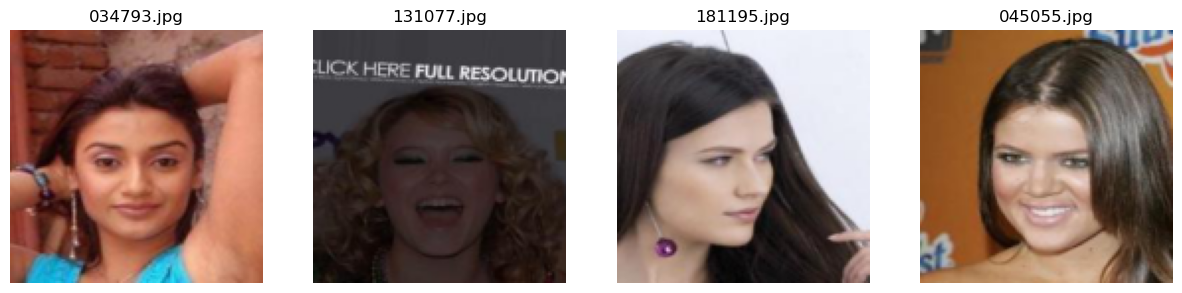

In [7]:
# 
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform

        if not os.path.isfile(attr_file):
            raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")           

        # CSV 파일로 속성 데이터 읽기
        self.attr_df = pd.read_csv(attr_file)
        
        # # 이미지 파일명이 올바른 형식인지 확인
        # print("첫 5개 이미지 파일명:", self.attr_df['Image'].head())

        # 이미지 파일명이 올바른 형식인지 확인
        print("첫 5개 이미지 파일명:", self.attr_df.iloc[:5, 0].values)
        
        # Male 속성으로 여성 이미지 필터링
        self.attr_df = self.attr_df[self.attr_df['Male'] == -1]
    
    # 데이터셋의 길이 (이미지 수)를 정의    
    def __len__(self):
        return len(self.attr_df) # 데이터프레임의 행 수(이미지 수)를 반환
    
    # 데이터셋에서 특정 항목(이미지와 이미지 이름)을 가져오는 함수
    def __getitem__(self, idx):
        # 첫 번째 열 이름을 가져옴 (이미지 ID 열)
        img_id_column = self.attr_df.columns[0]
        img_name = self.attr_df.iloc[idx][img_id_column]
        # 주어진 인덱스에서 이미지 파일 이름을 가져옴
        
        img_path = os.path.join(self.img_dir, img_name)
        # 이미지 파일의 전체 경로를 생성
        
        try:
            image = Image.open(img_path).convert("RGB")
            # 이미지를 열고 RGB 형식으로 변환
        except FileNotFoundError:
            raise FileNotFoundError(f"Image file '{img_path}' not found.")
            # 만약 이미지 파일이 존재하지 않으면 오류를 발생시킴
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

# 변환 정의
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 경로 설정

#base_dir = 'C:/Users/USER/Desktop/pytorch_book/data/celeba'
base_dir = './data/celeba'
img_dir = os.path.join(base_dir, 'img_align_celeba')
attr_file = os.path.join(base_dir, 'list_attr_celeba.csv')
print(f"이미지 디렉토리: {img_dir}")
print(f"속성 파일: {attr_file}")

# 디렉토리와 파일 존재 확인
if not os.path.isdir(img_dir):
    raise FileNotFoundError(f"Image directory '{img_dir}' not found.")
if not os.path.isfile(attr_file):
    raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")

# 속성 파일 내용 확인
print("\n속성 파일 내용 확인:")
with open(attr_file, 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # 첫 5줄만 출력
            print(line.strip())

# 데이터셋과 데이터로더 초기화
celebA_dataset = CelebADataset(img_dir=img_dir, attr_file=attr_file, transform=transform)
data_loader = DataLoader(celebA_dataset, batch_size=4, shuffle=True, num_workers=0)

# 이미지를 출력하는 함수
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    # 이미지를 보여줄 서브플롯을 설정 (1행 n열로 생성)
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].imshow(images[i].permute(1, 2, 0))
        axes[i].set_title(titles[i]) # 해당 이미지를 설명하는 제목을 설정
        axes[i].axis('off') # 축을 표시하지 않음
    plt.show()

# 이미지 표시
try:
    data_iter = iter(data_loader)
    images, names = next(data_iter)
    show_images(images, names)
except Exception as e:
    print(f"에러 발생: {str(e)}")
    print(f"에러 타입: {type(e).__name__}")
    raise


## 3. 데이터를 시각화

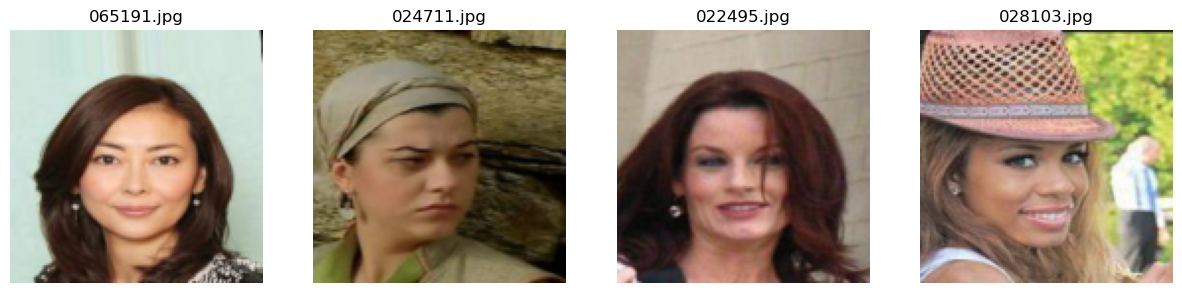

In [8]:
import matplotlib.pyplot as plt

# Function to display images
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    for i in range(n):
        axes[i].imshow(images[i].permute(1, 2, 0))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# Fetch a batch of images
data_iter = iter(data_loader)
images, names = next(data_iter)

# Display the images
show_images(images[:5], names[:5])


CelebA 데이터셋은 얼굴 이미지와 다양한 속성(예: 성별, 안경 착용 여부, 웃음 여부 등)을 포함하고 있습니다. 학습을 통해 가능한 것들은 다음과 같습니다:

속성 예측: CelebA의 특정 속성을 예측 (예: "Male" 여부 예측).
얼굴 분류 모델: 이미지에서 다중 속성을 예측.
생성 모델 또는 GAN: CelebA 이미지 텍스처 기반으로 새로운 얼굴 생성.
본 예제에서는 속성 예측(예: 이미지에서 "Male 여부"를 예측하는 이진 분류 작업)을 수행하는 학습 프로세스를 단계별로 설명하겠습니다.

## 4. 모델 학습

속성 분류를 위한 간단한 이미지를 처리할 수 있는 CNN(Convolutional Neural Network)을 설계합니다.

In [10]:
# 모델학습
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

# CelebADataset 클래스 정의
class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        
        if not os.path.isfile(attr_file):
            raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")
        
        with open(attr_file, 'r') as f:
            num_images = int(f.readline().strip())
            attr_names = f.readline().strip().split()
        
        self.attr_df = pd.read_csv(attr_file, sep=r'\s+', skiprows=2, names=['Image'] + attr_names)
        print("첫 5개 이미지 파일명:", self.attr_df['Image'].head())
        self.attr_df = self.attr_df[self.attr_df['Male'] == -1]
        
    def __len__(self):
        return len(self.attr_df)
    
    def __getitem__(self, idx):
        img_name = self.attr_df.iloc[idx]['Image']
        img_path = os.path.join(self.img_dir, img_name)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image file '{img_path}' not found.")
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

# 변환 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 데이터 경로 설정
base_dir = './data/celeba'
img_dir = os.path.join(base_dir, 'img_align_celeba')
attr_file = os.path.join(base_dir, 'list_attr_celeba.csv')

# 디렉토리와 파일 존재 확인
if not os.path.isdir(img_dir):
    raise FileNotFoundError(f"Image directory '{img_dir}' not found.")
if not os.path.isfile(attr_file):
    raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")

print("\n속성 파일 내용 확인:")
with open(attr_file, 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # 첫 5줄만 출력
            print(line.strip())

# 이미지 표시 함수
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].imshow(images[i].permute(1, 2, 0))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# 데이터셋과 데이터로더 초기화 및 이미지 표시
try:
    celebA_dataset = CelebADataset(img_dir=img_dir, attr_file=attr_file, transform=transform)
    data_loader = DataLoader(celebA_dataset, batch_size=4, shuffle=True, num_workers=0)
    
    data_iter = iter(data_loader)
    images, names = next(data_iter)
    show_images(images[:5], names[:5])
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
except Exception as e:
    print(f"에러 발생: {str(e)}")
    print(f"에러 타입: {type(e).__name__}")


속성 파일 내용 확인:
image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
에러 발생: invalid literal for

> # 남성 사진만 추출 : "남성 얼굴 갤러리"

In [12]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

# CelebADataset 클래스 정의
class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        
        if not os.path.isfile(attr_file):
            raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")
        
        with open(attr_file, 'r') as f:
            num_images = int(f.readline().strip())
            attr_names = f.readline().strip().split()
        
        self.attr_df = pd.read_csv(attr_file, sep=r'\s+', skiprows=2, names=['Image'] + attr_names)
        print("첫 5개 이미지 파일명:", self.attr_df['Image'].head())
        self.attr_df = self.attr_df[self.attr_df['Male'] == 1]  
        # 남성 이미지만 필터링

    def __len__(self):
        return len(self.attr_df)
    
    def __getitem__(self, idx):
        img_name = self.attr_df.iloc[idx]['Image']
        img_path = os.path.join(self.img_dir, img_name)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image file '{img_path}' not found.")
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

# 변환 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 데이터 경로 설정
base_dir = './data/celeba'
img_dir = os.path.join(base_dir, 'img_align_celeba')
attr_file = os.path.join(base_dir, 'list_attr_celeba.csv')

# 디렉토리와 파일 존재 확인
if not os.path.isdir(img_dir):
    raise FileNotFoundError(f"Image directory '{img_dir}' not found.")
if not os.path.isfile(attr_file):
    raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")

print("\n속성 파일 내용 확인:")
with open(attr_file, 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # 첫 5줄만 출력
            print(line.strip())

# 이미지 표시 함수
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].imshow(images[i].permute(1, 2, 0))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# 데이터셋과 데이터로더 초기화 및 이미지 표시
try:
    celebA_dataset = CelebADataset(img_dir=img_dir, attr_file=attr_file, transform=transform)
    data_loader = DataLoader(celebA_dataset, batch_size=4, shuffle=True, num_workers=0)
    
    data_iter = iter(data_loader)
    images, names = next(data_iter)
    show_images(images[:5], names[:5])
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
except Exception as e:
    print(f"에러 발생: {str(e)}")
    print(f"에러 타입: {type(e).__name__}")



속성 파일 내용 확인:
image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
에러 발생: invalid literal for

> # 안경 쓴 여성 사진 추출 : "안경 패션의 여성들"

In [13]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

# CelebADataset 클래스 정의
class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        
        if not os.path.isfile(attr_file):
            raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")
        
        with open(attr_file, 'r') as f:
            num_images = int(f.readline().strip())
            attr_names = f.readline().strip().split()
        
        self.attr_df = pd.read_csv(attr_file, sep=r'\s+', skiprows=2, names=['Image'] + attr_names)
        print("첫 5개 이미지 파일명:", self.attr_df['Image'].head())
        self.attr_df = self.attr_df[(self.attr_df['Male'] == -1) & (self.attr_df['Eyeglasses'] == 1)]
        
    def __len__(self):
        return len(self.attr_df)
    
    def __getitem__(self, idx):
        img_name = self.attr_df.iloc[idx]['Image']
        img_path = os.path.join(self.img_dir, img_name)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image file '{img_path}' not found.")
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

# 변환 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 데이터 경로 설정
base_dir = './data/celeba'
img_dir = os.path.join(base_dir, 'img_align_celeba')
attr_file = os.path.join(base_dir, 'list_attr_celeba.csv')

# 디렉토리와 파일 존재 확인
if not os.path.isdir(img_dir):
    raise FileNotFoundError(f"Image directory '{img_dir}' not found.")
if not os.path.isfile(attr_file):
    raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")

print("\n속성 파일 내용 확인:")
with open(attr_file, 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # 첫 5줄만 출력
            print(line.strip())

# 이미지 표시 함수
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].imshow(images[i].permute(1, 2, 0))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# 데이터셋과 데이터로더 초기화 및 이미지 표시
try:
    celebA_dataset = CelebADataset(img_dir=img_dir, attr_file=attr_file, transform=transform)
    data_loader = DataLoader(celebA_dataset, batch_size=4, shuffle=True, num_workers=0)
    
    data_iter = iter(data_loader)
    images, names = next(data_iter)
    show_images(images[:5], names[:5])
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
except Exception as e:
    print(f"에러 발생: {str(e)}")
    print(f"에러 타입: {type(e).__name__}")


속성 파일 내용 확인:
image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
에러 발생: invalid literal for

> # 안경 쓴 남성 사진 추출 : "안경 쓴 남성들"

In [14]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

# CelebADataset 클래스 정의
class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        
        if not os.path.isfile(attr_file):
            raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")
        
        with open(attr_file, 'r') as f:
            num_images = int(f.readline().strip())
            attr_names = f.readline().strip().split()
        
        self.attr_df = pd.read_csv(attr_file, sep=r'\s+', skiprows=2, names=['Image'] + attr_names)
        print("첫 5개 이미지 파일명:", self.attr_df['Image'].head())
        self.attr_df = self.attr_df[(self.attr_df['Male'] == 1) & (self.attr_df['Eyeglasses'] == 1)]
        
    def __len__(self):
        return len(self.attr_df)
    
    def __getitem__(self, idx):
        img_name = self.attr_df.iloc[idx]['Image']
        img_path = os.path.join(self.img_dir, img_name)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image file '{img_path}' not found.")
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

# 변환 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 데이터 경로 설정
base_dir = './data/celeba'
img_dir = os.path.join(base_dir, 'img_align_celeba')
attr_file = os.path.join(base_dir, 'list_attr_celeba.csv')

# 디렉토리와 파일 존재 확인
if not os.path.isdir(img_dir):
    raise FileNotFoundError(f"Image directory '{img_dir}' not found.")
if not os.path.isfile(attr_file):
    raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")

print("\n속성 파일 내용 확인:")
with open(attr_file, 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # 첫 5줄만 출력
            print(line.strip())

# 이미지 표시 함수
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].imshow(images[i].permute(1, 2, 0))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# 데이터셋과 데이터로더 초기화 및 이미지 표시
try:
    celebA_dataset = CelebADataset(img_dir=img_dir, attr_file=attr_file, transform=transform)
    data_loader = DataLoader(celebA_dataset, batch_size=4, shuffle=True, num_workers=0)
    
    data_iter = iter(data_loader)
    images, names = next(data_iter)
    show_images(images[:5], names[:5])
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
except Exception as e:
    print(f"에러 발생: {str(e)}")
    print(f"에러 타입: {type(e).__name__}")


속성 파일 내용 확인:
image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
에러 발생: invalid literal for

> # 헤어컬러 구분 여성 사진 출력

헤어 컬러가 검은색인 여성 이미지만 필터링하여 출력하는 소스를 구현해보겠습니다. 

CelebA 데이터셋에는 다양한 얼굴 특징에 대한 속성이 포함되어 있으며, `머리색에 대한 속성(Black_Hair, Blond_Hair, Brown_Hair, Gray_Hair)도 존재`합니다.

이제, 여성을 필터링한 후 **Black_Hair** 속성을 활용하여 헤어 컬러가 검은색인 여성 이미지만 선택하도록 수정한 소스입니다. 

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

# CelebADataset 클래스 정의
class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        
        if not os.path.isfile(attr_file):
            raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")
        
        with open(attr_file, 'r') as f:
            num_images = int(f.readline().strip())
            attr_names = f.readline().strip().split()
        
        self.attr_df = pd.read_csv(attr_file, sep=r'\s+', skiprows=2, names=['Image'] + attr_names)
        print("첫 5개 이미지 파일명:", self.attr_df['Image'].head())
        self.attr_df = self.attr_df[(self.attr_df['Male'] == -1) & (self.attr_df['Black_Hair'] == 1)]
        
    def __len__(self):
        return len(self.attr_df)
    
    def __getitem__(self, idx):
        img_name = self.attr_df.iloc[idx]['Image']
        img_path = os.path.join(self.img_dir, img_name)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image file '{img_path}' not found.")
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

# 변환 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 데이터 경로 설정
base_dir = './data/celeba'
img_dir = os.path.join(base_dir, 'img_align_celeba')
attr_file = os.path.join(base_dir, 'list_attr_celeba.csv')

# 디렉토리와 파일 존재 확인
if not os.path.isdir(img_dir):
    raise FileNotFoundError(f"Image directory '{img_dir}' not found.")
if not os.path.isfile(attr_file):
    raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")

print("\n속성 파일 내용 확인:")
with open(attr_file, 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # 첫 5줄만 출력
            print(line.strip())

# 이미지 표시 함수
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].imshow(images[i].permute(1, 2, 0))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# 데이터셋과 데이터로더 초기화 및 이미지 표시
try:
    celebA_dataset = CelebADataset(img_dir=img_dir, attr_file=attr_file, transform=transform)
    data_loader = DataLoader(celebA_dataset, batch_size=4, shuffle=True, num_workers=0)
    
    data_iter = iter(data_loader)
    images, names = next(data_iter)
    show_images(images[:5], names[:5])
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
except Exception as e:
    print(f"에러 발생: {str(e)}")
    print(f"에러 타입: {type(e).__name__}")


속성 파일 내용 확인:
image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
에러 발생: invalid literal for

> # 콧수염이 있고 모자를 착용한 남성 이미지 추출 - "클래식 젠틀맨 룩"

**관련 속성(Mustache와 Wearing_Hat)과 남성(Male) 속성을 사용하여 필터링합니다.**

In [16]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import matplotlib.pyplot as plt

# CelebADataset 클래스 정의
class CelebADataset(Dataset):
    def __init__(self, img_dir, attr_file, transform=None):
        self.img_dir = img_dir
        self.transform = transform
        
        if not os.path.isfile(attr_file):
            raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")
        
        with open(attr_file, 'r') as f:
            num_images = int(f.readline().strip())
            attr_names = f.readline().strip().split()
        
        self.attr_df = pd.read_csv(attr_file, sep=r'\s+', skiprows=2, names=['Image'] + attr_names)
        print("첫 5개 이미지 파일명:", self.attr_df['Image'].head())
        # 남성을 필터링하고 콧수염이 있고 모자를 착용한 경우만 선택
        self.attr_df = self.attr_df[(self.attr_df['Male'] == 1) & 
                                    (self.attr_df['Mustache'] == 1) & 
                                    (self.attr_df['Wearing_Hat'] == 1)]
        
    def __len__(self):
        return len(self.attr_df)
    
    def __getitem__(self, idx):
        img_name = self.attr_df.iloc[idx]['Image']
        img_path = os.path.join(self.img_dir, img_name)
        
        try:
            image = Image.open(img_path).convert("RGB")
        except FileNotFoundError:
            raise FileNotFoundError(f"Image file '{img_path}' not found.")
        
        if self.transform:
            image = self.transform(image)
        
        return image, img_name

# 변환 설정
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# 데이터 경로 설정
base_dir = './data/celeba'
img_dir = os.path.join(base_dir, 'img_align_celeba')
attr_file = os.path.join(base_dir, 'list_attr_celeba.csv')

# 디렉토리와 파일 존재 확인
if not os.path.isdir(img_dir):
    raise FileNotFoundError(f"Image directory '{img_dir}' not found.")
if not os.path.isfile(attr_file):
    raise FileNotFoundError(f"Attribute file '{attr_file}' not found.")

print("\n속성 파일 내용 확인:")
with open(attr_file, 'r') as f:
    for i, line in enumerate(f):
        if i < 5:  # 첫 5줄만 출력
            print(line.strip())

# 이미지 표시 함수
def show_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(15, 5))
    if n == 1:
        axes = [axes]
    for i in range(n):
        axes[i].imshow(images[i].permute(1, 2, 0))
        axes[i].set_title(titles[i])
        axes[i].axis('off')
    plt.show()

# 데이터셋과 데이터로더 초기화 및 이미지 표시
try:
    celebA_dataset = CelebADataset(img_dir=img_dir, attr_file=attr_file, transform=transform)
    data_loader = DataLoader(celebA_dataset, batch_size=4, shuffle=True, num_workers=0)
    
    data_iter = iter(data_loader)
    images, names = next(data_iter)
    show_images(images[:5], names[:5])
except FileNotFoundError as e:
    print(f"파일을 찾을 수 없습니다: {e}")
except Exception as e:
    print(f"에러 발생: {str(e)}")
    print(f"에러 타입: {type(e).__name__}")


속성 파일 내용 확인:
image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,Blurry,Brown_Hair,Bushy_Eyebrows,Chubby,Double_Chin,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,Male,Mouth_Slightly_Open,Mustache,Narrow_Eyes,No_Beard,Oval_Face,Pale_Skin,Pointy_Nose,Receding_Hairline,Rosy_Cheeks,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,1,-1,1,-1,-1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,-1,1,-1,-1,1
000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,1
000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,1,-1,-1,1,-1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,1
000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,1,-1,1,-1,1,1,-1,1
에러 발생: invalid literal for

### CelebA 데이터셋은 다양한 컴퓨터 비전 작업에 활용되고 있으며, 주요 사용 사례는 다음과 같습니다
- **얼굴 속성 인식** : 40개의 이진 속성 주석을 활용하여 안경 착용 여부, 머리 색상, 표정 등 다양한 얼굴 특징을 인식하는 모델을 훈련합니다.
- **얼굴 검출** : 다양한 포즈와 배경을 가진 이미지에서 얼굴을 검출하는 알고리즘을 개발합니다.
- **랜드마크 위치 추정** : 5개의 랜드마크 위치 정보를 이용해 얼굴의 주요 부위를 정확히 찾아내는 모델을 훈련합니다.
- **얼굴 이미지 생성 및 편집** : GAN(Generative Adversarial Network)을 훈련시켜 새로운 얼굴 이미지를 생성하거나 기존 이미지를 편집하는 데 활용됩니다.